In [2]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
fclim = '../../data/cmems_climatology_mon.nc'
path1 = '../output/251210/dync.nc'
# new vertical grid
ds = xr.open_dataset(fclim)
dep = ds['depth'].values
dr = np.zeros(dep.shape)
lev = 0
for i in range(dep.size):
    dr[i] = 2*(dep[i]-lev)
    lev += dr[i]
Rid = [0,6,10,13,16,18,20,21,22,23,24]+[id for id in range(25,dep.size)]
dR = np.zeros(len(Rid)-1)
for i in range(len(Rid)-1):
    dR[i] = dr[Rid[i]:Rid[i+1]].sum()
intR = dR.cumsum()
dep = (intR[:-1]+intR[1:])/2
dep = np.insert(dep,0,dR[0]/2)
dep = np.round(dep,0)
print('Nr  = {:4d}'.format(len(dR)))
print('delR='+''.join(f"{x:.0f}.," for x in dR))
print('intR='+''.join(f"{x:.0f}.," for x in intR))
print('depR='+''.join(f"{x:.0f}, " for x in dep))


Nr  =   35
delR=7.,7.,9.,14.,14.,20.,13.,16.,19.,23.,27.,33.,40.,48.,57.,68.,80.,94.,111.,129.,149.,171.,195.,219.,245.,270.,296.,321.,344.,366.,386.,405.,421.,435.,448.,
intR=7.,15.,23.,37.,51.,71.,84.,100.,119.,142.,170.,203.,242.,290.,346.,414.,494.,588.,699.,828.,977.,1148.,1343.,1562.,1807.,2077.,2373.,2694.,3038.,3404.,3790.,4195.,4616.,5051.,5499.,
depR=4, 11, 19, 30, 44, 61, 78, 92, 110, 131, 156, 186, 222, 266, 318, 380, 454, 541, 644, 763, 902, 1062, 1245, 1452, 1684, 1942, 2225, 2533, 2866, 3221, 3597, 3992, 4405, 4833, 5275, 


In [3]:
ds = xr.open_dataset(fclim)


<xarray.Dataset> Size: 1GB
Dimensions:      (Zmd000035: 35, Xp1: 721, Y: 192, X: 720, Yp1: 193, T: 12,
                  Zld000035: 35)
Coordinates:
  * Xp1          (Xp1) float64 6kB 111.9 112.1 112.4 112.6 ... 291.4 291.6 291.9
  * Y            (Y) float64 2kB -23.0 -22.75 -22.5 -22.25 ... 24.25 24.5 24.75
  * X            (X) float64 6kB 112.0 112.2 112.5 112.8 ... 291.2 291.5 291.8
  * Yp1          (Yp1) float64 2kB -23.12 -22.88 -22.62 ... 24.38 24.62 24.88
  * T            (T) datetime64[ns] 96B 1942-02-14T22:30:00 ... 1943-01-15T18...
Dimensions without coordinates: Zmd000035, Zld000035
Data variables:
    diag_levels  (Zmd000035) float64 280B ...
    iter         (T) int32 48B ...
    UVEL         (T, Zmd000035, Y, Xp1) float32 233MB ...
    VVEL         (T, Zmd000035, Yp1, X) float32 233MB ...
    WVEL         (T, Zld000035, Y, X) float32 232MB ...
    THETA        (T, Zmd000035, Y, X) float32 232MB ...
    SALT         (T, Zmd000035, Y, X) float32 232MB ...
    PHIHYD       (T, Zmd000035, Y, X) float32 232MB ...
Attributes: (12/18)
    MITgcm_version:  checkpoint69e
    build_user:      zhanghang
    build_host:      login1
    build_date:      Tue Dec  9 17:33:39 CST 2025
    MITgcm_URL:      http://mitgcm.org
    MITgcm_tag_id:   
    ...              ...
    nSy:             1
    nPx:             16
    nPy:             4
    Nx:              720
    Ny:              192
    Nr:              35

Text(0.5, 1.0, 'depth = 1942.0, month = 12')

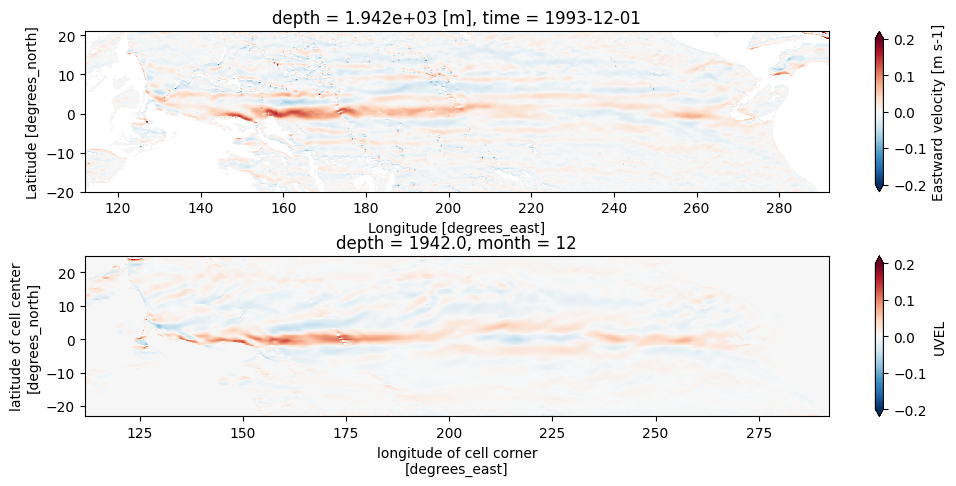

In [14]:

intR=np.array([7.,15.,23.,37.,51.,71.,84.,100.,119.,142.,170.,203.,242.,290.,346.,414.,494.,588.,699.,828.,977.,1148.,1343.,1562.,1807.,2077.,2373.,2694.,3038.,3404.,3790.,4195.,4616.,5051.,5499.])
dep = (intR[:-1]+intR[1:])/2

vmax = 0.2
mon = 11
yr = 2
a = xr.open_dataset(fclim)
b = xr.open_dataset(path1).isel(T=slice(yr*12,12*(yr+10)))
display(b)
fg = plt.figure(figsize=(12,5))
gs = fg.add_gridspec(2, 1, hspace=0.4)
plt.subplot(gs[0])

a['uo'][mon,39,:,:].plot(vmin=-vmax,vmax=vmax,cmap='RdBu_r',extend='both')
plt.xlim(112,292)
plt.ylim(-20,21)
lev = 24
plt.subplot(gs[1])
bb = b['UVEL'][mon::12,lev,:,:].mean('T')
bb.plot(vmin=-vmax,vmax=vmax,cmap='RdBu_r',extend='both')
plt.title(f'depth = {dep[lev]}, month = {mon+1}')


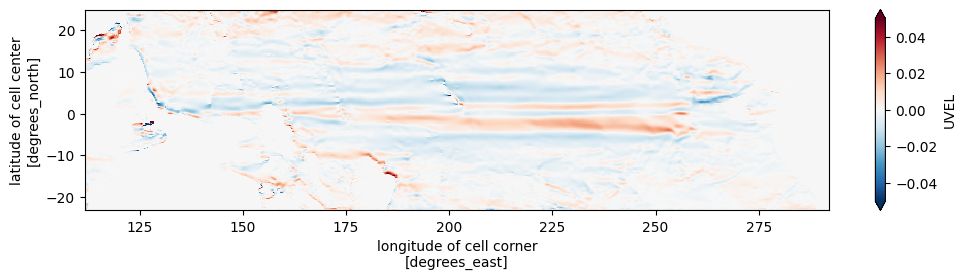

In [30]:
import MITgcmutils as mutils
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
path = '../output/251210/'
a = xr.open_dataset(path + 'dync.nc')

id = slice(0,12)
lev = 27
plt.figure(figsize=(12,12))
plt.subplot(4,1,1)
a['UVEL'][id,lev].mean('T').plot(cmap='RdBu_r',vmin=-0.05, vmax=0.05)


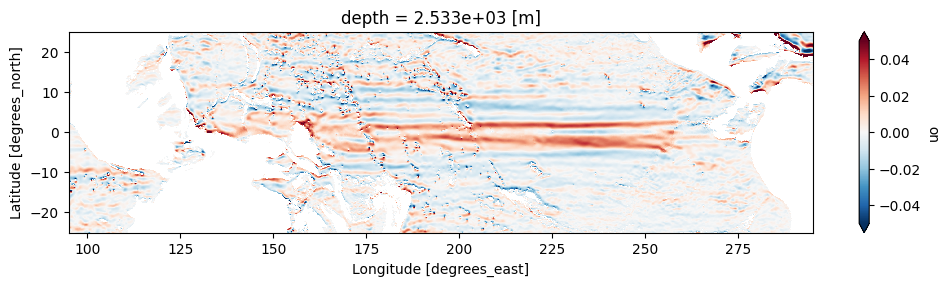

In [27]:
import MITgcmutils as mutils
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
path = '../../data/cmems_climatology_mon.nc'
a = xr.open_dataset(path)

id = slice(0,12)
lev = 41
plt.figure(figsize=(12,12))
plt.subplot(4,1,1)
a['uo'][id,lev].mean('time').plot(cmap='RdBu_r',vmin=-0.05, vmax=0.05)
